In [17]:
from pathlib import Path
import os
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import re
import datetime


In [18]:

def extract_date(string):
    pattern = r'(\d{4})/(\d{1,2})/(\d{1,2})'
    match = re.search(pattern, string)
    if match:
        year, month, day = map(int, match.groups())
        try:
            return datetime.date(year, month, day)
        except ValueError:
            return None
    else:
        return None
    


def find_closest_index(array1, target, has_to_be_before):
    array1 = np.array(array1)[:has_to_be_before+1]
    return np.argmin(np.abs(array1 - target))



In [19]:


notebooks_folder = Path.cwd()
plots_folder = notebooks_folder / 'Plots'
excel_path = notebooks_folder / 'Excel Files' / 'Dimensionless Numbers PTV.xlsx'
density_path = notebooks_folder / 'Excel Files' / 'Density profile.xlsx'
pickle_location = notebooks_folder / 'Excel Files' / 'The Big Pickle.pkl'
the_pickle = Mf.load_pickle(pickle_location)
the_keys = the_pickle.keys()



In [20]:


to_skip = [
    'Object To Follow',
    'Experiment Date 2023/12/20 Experiment Number 1 Record Number 1',
    'Experiment Date 2023/12/18 Experiment Number 2 Record Number 5',
    'Experiment Date 2024/1/23 Experiment Number 2 Record Number 12',
    'Experiment Date 2024/1/23 Experiment Number 2 Record Number 13',
    'Experiment Date 2024/1/2 Experiment Number 2 Record Number 2',
    'Experiment Date 2024/1/2 Experiment Number 2 Record Number 3',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 13',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 15',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 18',
    ]

to_do = ['Experiment Date 2024/1/24 Experiment Number 1']
to_do = ['Experiment Date 2024/2/22 Experiment Number 1']
to_do = ['Experiment Date 2024/1/23 Experiment Number 1']
to_do = ['Experiment Date 2024/1/21 Experiment Number 1']
to_do = ['Experiment Date 2024/1/22 Experiment Number 1']
to_do = [
    'Experiment Date 2024/1/21 Experiment Number 1',
    'Experiment Date 2024/1/22 Experiment Number 1',
    'Experiment Date 2024/1/23 Experiment Number 1',
    'Experiment Date 2024/1/24 Experiment Number 1',
]



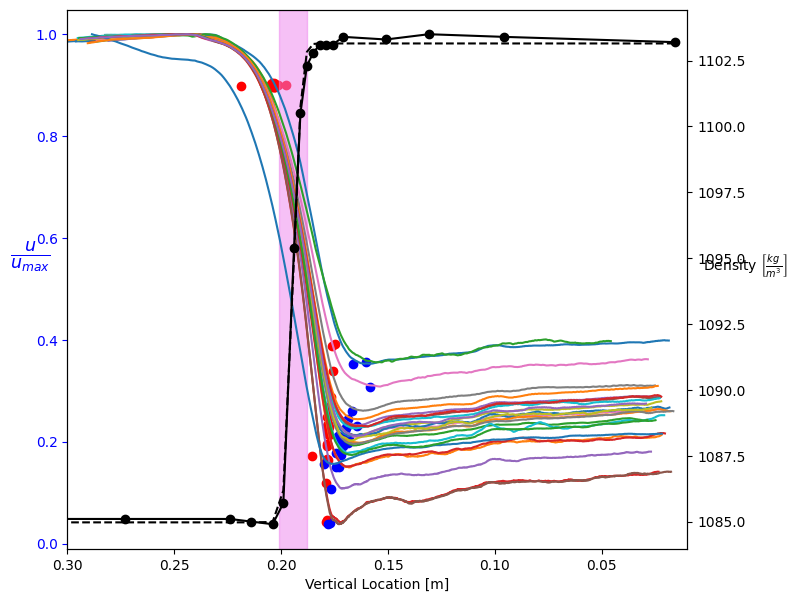

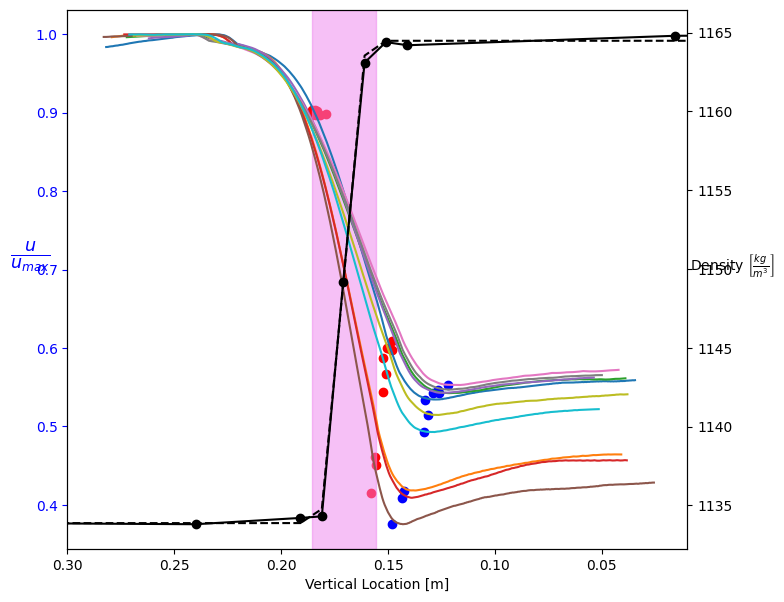

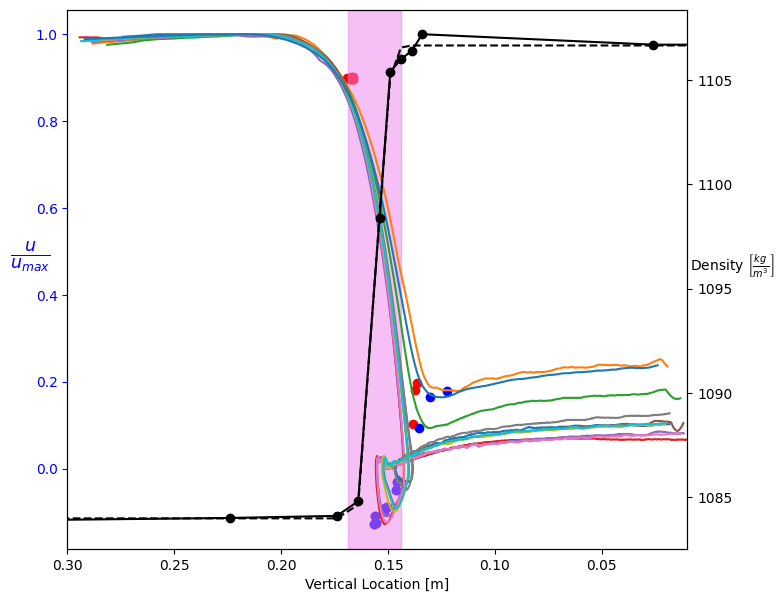

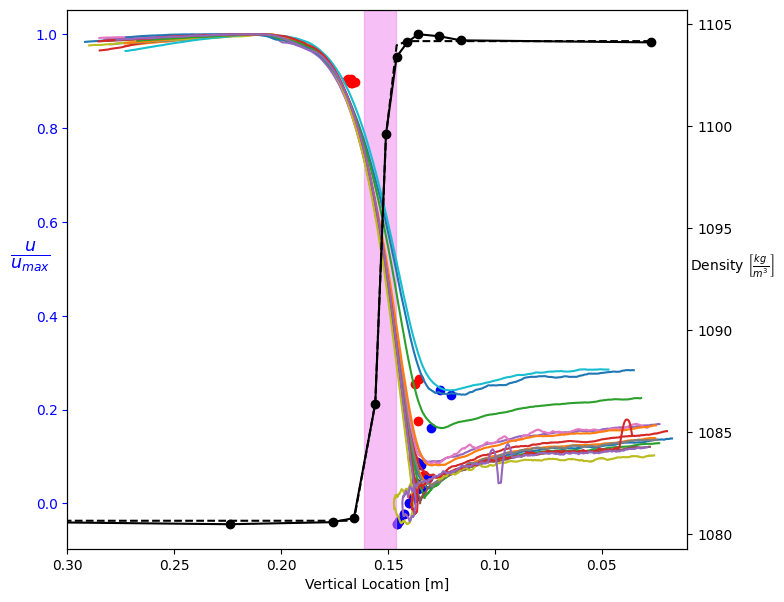

In [21]:

show_legend = False

found_width = []
found_width_dictionary = {}
for el11 in to_do:
    fig, ax = plt.subplots(figsize=(8, 7))

    date1 = extract_date(el11)

    y_loccccc, densityccccc = Mf.load_density_profile_from_excel(excel_path=density_path, date=date1, set_number=1)
    y_loccccc2 = np.array(y_loccccc)
    densityccccc2 = np.array(densityccccc)
    Interface_height = Mf.find_average_density_location(y_loccccc2, densityccccc2)
    Interface_thickness = Mf.find_interface_thickness(y_loccccc2, densityccccc2)

    interface_lower_location = Interface_height + Interface_thickness/2
    interface_upper_location = Interface_height - Interface_thickness/2

    for ind, el in enumerate(the_keys):
        holo = el[:45]
        if holo in el11:
            if not el in to_skip:

              
                current = the_pickle[el]
                locc =  np.array(current['Vertical Location For Velocity [m] list'])
                timee = current['Velocity Times [sec] list']
                velocii = np.array(current['Velocity [m/s] list'])
                date1 = current['Experiment Date']
                sphere_densityy = current['Calculated sphere density [kg/m^3]']
                sphere_diameterr = current['Sphere Diameter [m]']
                exp_num = current['Experiment number']
                indexxxx = current['Record number']
                # fps = current['Frames Per Second']

        
                pos_velo = -velocii
                min_index = np.where(pos_velo == min(pos_velo))[0][0]
                min_index1 = np.where(pos_velo == min(pos_velo))[0][0]

                
                ax.plot(locc, -velocii/max(-velocii), label = 'location at center - regular')
                # ax.plot(locc-sphere_diameterr/2, -velocii/max(-velocii), linestyle='dashed', label = 'location at min y')
                # ax.plot(locc+sphere_diameterr/2, -velocii/max(-velocii), linestyle='dashed', label = 'location at max y')

                #verify
                velocity_change_entrace = 0.90
                velocity_change_min = 1.1
                the_index_is = np.abs(pos_velo/max(pos_velo) - velocity_change_entrace).argmin()
                min_index_moved = find_closest_index(pos_velo, min(pos_velo)*velocity_change_min, min_index1)
                if min(pos_velo)<0:
                    min_index_moved = np.abs(pos_velo - min(pos_velo)+np.abs(min(pos_velo))*(velocity_change_min-1)).argmin()
                    min_index_moved = find_closest_index(pos_velo, min(pos_velo)+np.abs(min(pos_velo))*(velocity_change_min-1), min_index1)
                    min_index_moved = min_index1

                ax.scatter(locc[the_index_is]-sphere_diameterr/2, -velocii[the_index_is]/max(-velocii), color ='red')
                ax.scatter((locc+sphere_diameterr/2)[min_index_moved], -velocii[min_index_moved]/max(-velocii), color ='red')
                ax.scatter((locc+sphere_diameterr/2)[min_index1], -velocii[min_index1]/max(-velocii), color ='blue')
                found_width.append(np.abs(locc[the_index_is]-sphere_diameterr/2-(locc+sphere_diameterr/2)[min_index_moved]))

    found_width_dictionary[el11 + ' measured'] = Interface_thickness
    found_width_dictionary[el11 + ' estimate'] = np.average(np.array(found_width))
    found_width = []



    hight_of_y_label = 0.55
    rho_function = Mf.create_callable_function_of_data(y_loccccc, densityccccc)

    first_color = 'blue'
    ax.set_xlabel(r'Vertical Location [m]', fontsize = 10)
    ax.set_ylabel(r'$\frac {u} {u_{max}}$', color = first_color, rotation = 0, fontsize=18, y = hight_of_y_label-0.04)
    ax.tick_params('y', colors = first_color)
    # ax.invert_xaxis()



    # Define a model function
    p0 = [2*np.pi/Interface_thickness, Interface_height, np.abs(densityccccc2[-1]-densityccccc2[0])/2, np.average(densityccccc2)] #initial guess
    y_fit = Mf.fit_error_function_to_data(y_loccccc2, densityccccc2, p0=p0)


    secod_color = 'black'
    ax2 = ax.twinx()

    Interface_height = Mf.find_average_density_location(y_loccccc2, densityccccc2)
    interface_lower_location = Interface_height - Interface_thickness/2


    # Define the coordinates and dimensions of the rectangle
    rect_x = interface_lower_location #[m]
    rect_width = Interface_thickness
    rect_y = ax.get_ylim()[0]
    rect_height = ax.get_ylim()[1] - rect_y # Cover the entire y-axis range
    rect_patch = patches.Rectangle((rect_x, rect_y), rect_width, rect_height, alpha=0.5, color='violet', label='Interface Thickness [m]')
    ax.add_patch(rect_patch)


    ax2.plot(y_loccccc2, densityccccc2,'-o', color=secod_color, label= 'Density Profile')
    ax2.plot(y_loccccc2, y_fit,'--', color=secod_color, label= 'Fitted Density Profile')
    ax2.set_ylabel(r'Density $ \left[ \frac {kg} {m^3} \right]$', color=secod_color, rotation=0, labelpad=0, y=hight_of_y_label)
    ax2.tick_params('y', colors=secod_color)


    # Add legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    if show_legend:
        plt.legend(lines + lines2, labels + labels2, fancybox=True, framealpha=0, loc='center left')

    # ax2.set_xlim(left=None, right=0.3)
    ax2.set_xlim(left=0.01, right=0.3)

    plt.gca().invert_xaxis()
    # plt.legend()
    plt.show()
    plt.close()
# holo = to_do[0][:45]

In [22]:
for el11 in to_do:
    print(f"{extract_date(el11[:45])} -> measured = {found_width_dictionary[el11 + ' measured']} [m]   estimate = {found_width_dictionary[el11 + ' estimate']:.3f} [m]    difference of {100*np.abs(found_width_dictionary[el11 + ' measured']-found_width_dictionary[el11 + ' estimate'])/np.max([found_width_dictionary[el11 + ' measured'], found_width_dictionary[el11 + ' estimate']]):.2f} %")

2024-01-21 -> measured = 0.013 [m]   estimate = 0.026 [m]    difference of 49.53 %
2024-01-22 -> measured = 0.03 [m]   estimate = 0.031 [m]    difference of 4.47 %
2024-01-23 -> measured = 0.025 [m]   estimate = 0.019 [m]    difference of 22.37 %
2024-01-24 -> measured = 0.015 [m]   estimate = 0.029 [m]    difference of 48.52 %
